In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [59]:
data1 = pd.read_csv ('Data/RAW/investigator_ftldlbd_nacc64.csv')
data2 = pd.read_csv ('Data/RAW/investigator_mri_nacc64.csv')

/var/folders/s4/9tl_p06528vgmf3960zqdvkh0000gn/T/ipykernel_18121/3828986518.py:1: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010,1029,1034,1204,1208,1211,1407,1409,1411,1412,1414,1421,1423,1425,1426,1433,1435,1437,1439,1440,1447,1462,1476,1490,1504,1506,1542,1558,1560,1562,1564,1566,1568,1570,1572,1574,1576,1578,1580,1582,1584,1586,1588,1590,1592,1594,1596,1598,1600,1602,1604,1606,1608,1610,1612,1662,1663,1665,1666,1669,1670,1673,1674,1677,1678,1681,1682,1756,1815,1824,1826,1828,1830,1841,1843,1845,1853,1855,1857,1859,1867,1869,1871,1873,1899) h

In [60]:
data1= data1.dropna(axis=1, how='any')
data1= data1.dropna(axis=0, how='any')

data2= data2.dropna(axis=1, how='any')
data2= data2.dropna(axis=0, how='any')

data = pd.merge(data1,data2, on = "NACCID")
data

,NACCID,NACCADC_x,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM_x,NACCAVST,NACCNVST,...,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM,NACCNMRI_y,NACCDICO,NACCVNUM_y,NACCMRSA_y
0,NACC037891,186,I,3.0,2,13,2023,1,1,1,...,88.8888,8.8888,88.8888,8.8888,88.8888,8.8888,1,1,1,1
1,NACC043785,186,I,3.0,4,21,2022,1,1,1,...,88.8888,8.8888,88.8888,8.8888,88.8888,8.8888,1,1,1,1
2,NACC113458,186,I,3.0,3,7,2023,1,1,1,...,88.8888,8.8888,88.8888,8.8888,88.8888,8.8888,1,1,1,1
3,NACC136503,186,I,3.0,2,15,2023,1,1,1,...,88.8888,8.8888,88.8888,8.8888,88.8888,8.8888,1,1,1,1
4,NACC153149,186,I,3.0,3,3,2023,1,1,1,...,88.8888,8.8888,88.8888,8.8888,88.8888,8.8888,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70228,NACC992483,9661,F,2.0,5,1,2014,6,10,10,...,88.8888,8.8888,88.8888,8.8888,88.8888,8.8888,1,1,9,1
70229,NACC992483,9661,F,3.0,8,21,2015,7,10,10,...,88.8888,8.8888,88.8888,8.8888,88.8888,8.8888,1,1,9,1
70230,NACC992483,9661,F,3.0,3,2,2017,8,10,10,...,88.8888,8.8888,88.8888,8.8888,88.8888,8.8888,1,1,9,1
70231,NACC992483,9661,F,3.0,8,24,2018,9,10,10,...,88.8888,8.8888,88.8888,8.8888,88.8888,8.8888,1,1,9,1


Predictor

1) Age: NACCAGE

2) BMI: NACCBMI

3) Smoking:

- TOBAC30: Has the subject smoked within the last
30 days?
- TOBAC100: Has the subject smoked more than 100
cigarettes in his/her life?
- SMOKYRS: Total years smoked
- PACKSPER: Average number of packs per day
smoked
- QUITSMOK: If subject quit smoking, specify age
when last smoked

4) ALCOHOL:  Having a significant problem
occurring either in work, driving, legal
or social

5) DIABETES: presence of Diabetes

6) HYPERTEN: History or presence of hypertension

7) CVHATT: Heart attack or cardiac arrest

8) SEX

**MCI**

9) CDRSUM: Standard CDR sum of boxes

10) DECIN: Does the informant report a decline in subject’s memory relative to previously attained abilities?

11) MOSLOW: Has the subject noticeably slowed down in walking or moving or handwriting, other than due to an injury or illness? Has his/her facial expression changed, or become more “wooden” or masked and unexpressive?)

12) MEMORY: Memory in Clinical Dementia Rating (CDR)
0.0 = No impairment
0.5 = Questionable impairment
1.0 = Mild impairment
2.0 = Moderate impairment
3.0 = Severe impairment

13) SPEECH: 0 = Normal.
1 = Slight loss of expression, diction and/or volume.
2 = Monotone, slurred but understandable; moderately impaired.
3 = Marked impairment,

14) BILLS: Bills in Functional Activities Questionnaire (FAQ)
In the past four weeks, did the subject have any difficulty or need help with writing checks, paying bills, or balancing a checkbook.
0 = Normal
1 = Has difficulty, but does by self
2 = Requires assistance
3 = Dependent
8 = Not applicable (e.g., never did)


15) TRAVEL: In the past four weeks, did the subject have any difficulty or need help with traveling out of the neighborhood, driving, or arranging to take public transportation.
0 = Normal
1 = Has difficulty, but does by self
2 = Requires assistance
3 = Dependent
8 = Not applicable (e.g., never did)

16) MOFALLS: Does the subject fall more than usual?
0 = No
1 = Yes

17) MOTREM: Has the subject had rhythmic shaking, especially in the hands, arms, legs, head, mouth or tongue?)
0 = No
1 = Yes



In [61]:
col = data[['NACCID', 'CDRSUM', 'DECIN', 'MOSLOW', 'MEMORY', 'SPEECH', 'BILLS', 'TRAVEL', 'MOFALLS', 'MOTREM', 'NACCAGE', 'NACCBMI', 'TOBAC30', 'TOBAC100', 'SMOKYRS', 'PACKSPER', 'QUITSMOK', 'ALCOHOL', 'DIABETES', 'HYPERTEN', 'CVHATT', 'SEX']]
new_data = pd.DataFrame(col)
new_data = new_data[(new_data['NACCBMI'] < 50) & (new_data['NACCBMI'] > 0)]
new_data = new_data[(new_data['PACKSPER'] > -1)]
new_data = new_data[(new_data['QUITSMOK'] < 100)]

In [62]:
new_data.to_csv('selected_features.csv', index=False)

# **K-means Clustering**

In [63]:
selected_features = pd.read_csv ('Data/selected_features.csv')

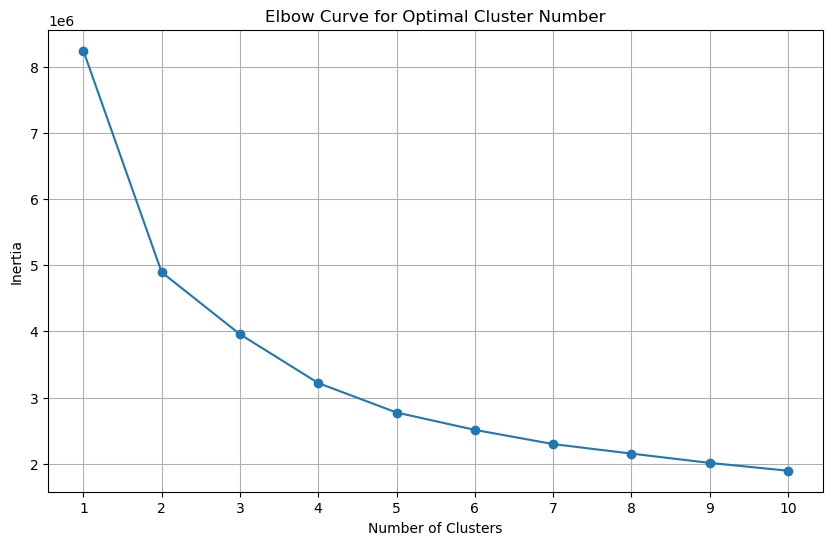

In [64]:

# Initialize k-means clustering with a range of possible cluster numbers
min_clusters = 1  # Minimum number of clusters to try
max_clusters = 10  # Maximum number of clusters to try
cluster_scores = []

for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(selected_features.drop(columns=['NACCID']))
    cluster_scores.append(kmeans.inertia_)  # Save the inertia (within-cluster sum of squares) for each cluster number

# Plot the elbow curve to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), cluster_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal Cluster Number')
plt.xticks(range(min_clusters, max_clusters + 1))
plt.grid(True)
plt.show()


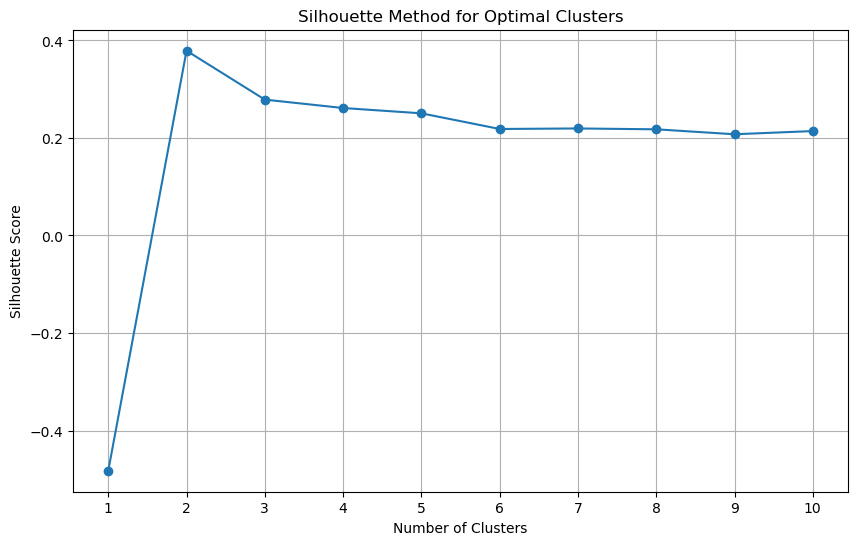

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

max_clusters = 10
silhouette_scores = []

eps = 0.5
min_samples = 5

for n_clusters in range(1, max_clusters+1):
    if n_clusters == 1:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(selected_features.drop(columns=['NACCID']))
        silhouette_avg = silhouette_score(selected_features.drop(columns=['NACCID']), cluster_labels)
    else:
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(selected_features.drop(columns=['NACCID']))
        silhouette_avg = silhouette_score(selected_features.drop(columns=['NACCID']), cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Clusters')
plt.xticks(range(1, max_clusters+1))
plt.grid(True)
plt.show()


# ADD CLASS

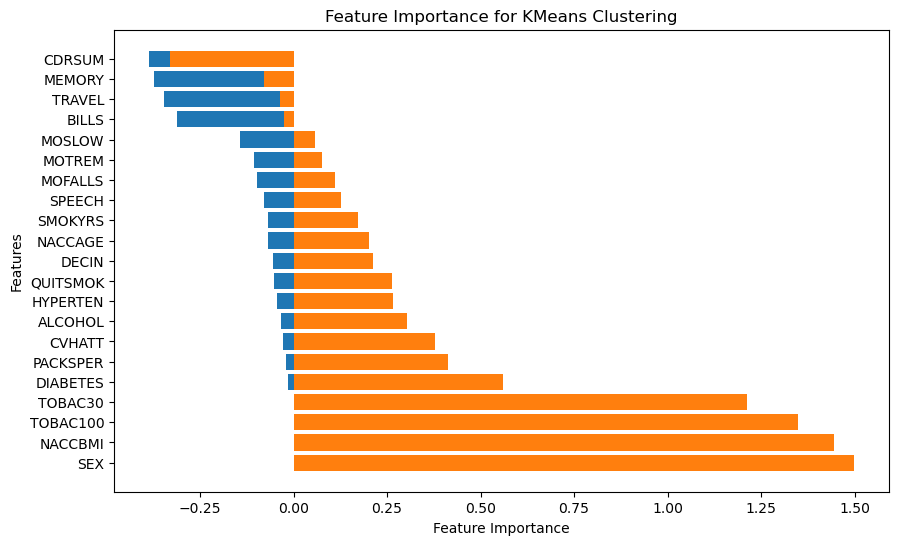

In [66]:
id_column = 'NACCID'
features = selected_features.drop(id_column, axis=1)

# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform k-means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Get centroids and feature importance
centroids = kmeans.cluster_centers_
feature_importance = kmeans.cluster_centers_.argsort()[:, ::-1]

feature_names = features.columns

plt.figure(figsize=(10, 6))
for cluster_num in range(len(centroids)):
    plt.barh(range(features.shape[1]), centroids[cluster_num][feature_importance[cluster_num]], align='center')
plt.yticks(range(features.shape[1]), [feature_names[i] for i in feature_importance[0]])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for KMeans Clustering')
plt.show()

In [67]:
# Add class
selected_features['Class'] = clusters
selected_features

,NACCID,CDRSUM,DECIN,MOSLOW,MEMORY,SPEECH,BILLS,TRAVEL,MOFALLS,MOTREM,...,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOHOL,DIABETES,HYPERTEN,CVHATT,SEX,Class
0,NACC235922,3.5,1,0,1.0,-4,1,0,0,0,...,1,22,2,40,0,0,1,0,2,0
1,NACC383757,0.5,8,0,0.5,-4,0,0,0,0,...,1,15,5,28,2,0,1,0,1,0
2,NACC418253,2.0,1,0,1.0,-4,0,0,0,0,...,1,10,2,30,0,0,0,0,2,0
3,NACC433163,0.5,1,0,0.5,-4,8,0,0,1,...,1,2,2,17,0,0,0,0,1,0
4,NACC476187,5.0,1,0,1.0,-4,3,3,0,0,...,1,25,2,45,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13684,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0
13685,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0
13686,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0
13687,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0


In [68]:
selected_features.to_csv('added_classes.csv', index=False)

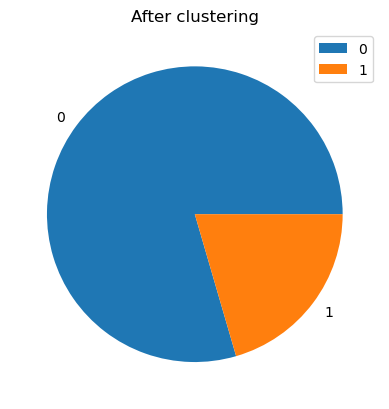

In [69]:
# Create pie chart
cluster_n = selected_features['Class'].value_counts()

# Plotting pie chart
plt.pie(cluster_n, labels=cluster_n.index)

# Add title
plt.title('After clustering')
plt.legend()
# Show plot
plt.show()

# put EDA code here because of interpretation

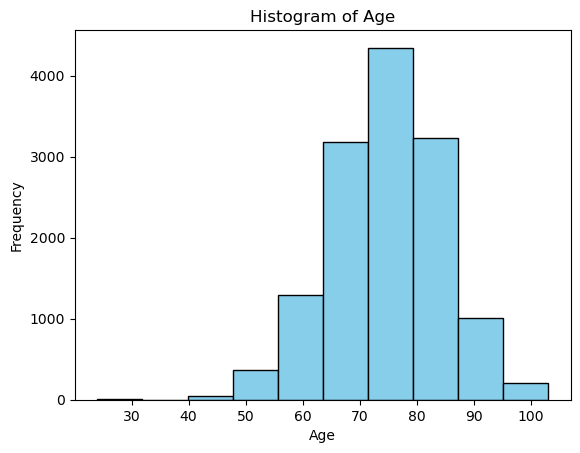

In [70]:
import matplotlib.pyplot as plt
import math
# Create histogram
plt.hist(new_data['NACCAGE'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show plot
plt.show()

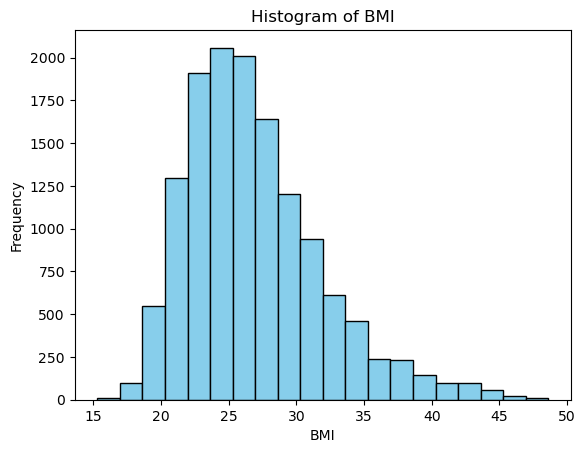

In [71]:
#Remove BMI between 0 and 50

# Create histogram
plt.hist(new_data['NACCBMI'], bins = 20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')

# Show plot
plt.show()

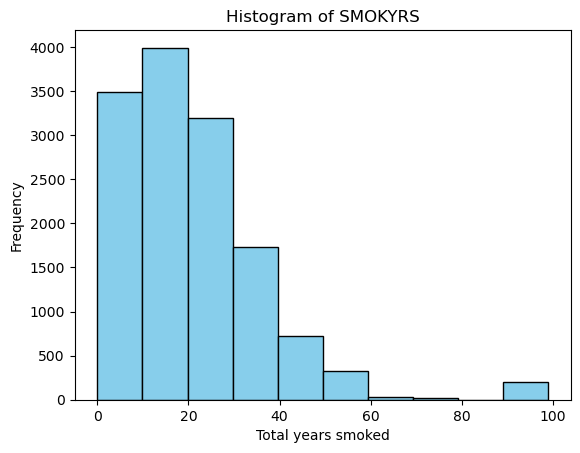

In [72]:
# Create histogram
plt.hist(new_data['SMOKYRS'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Total years smoked')
plt.ylabel('Frequency')
plt.title('Histogram of SMOKYRS')

# Show plot
plt.show()

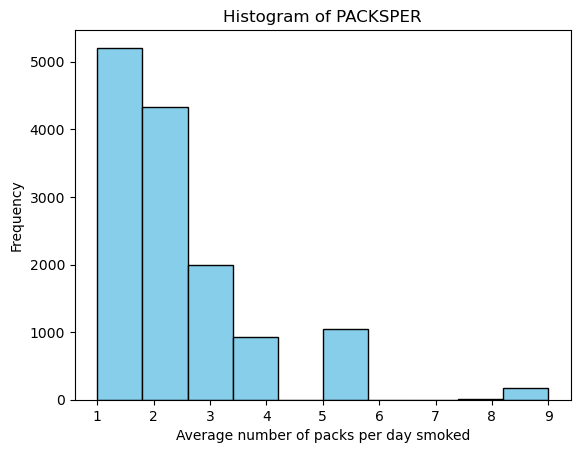

In [73]:
# Create histogram
plt.hist(new_data['PACKSPER'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Average number of packs per day smoked')
plt.ylabel('Frequency')
plt.title('Histogram of PACKSPER')

# Show plot
plt.show()

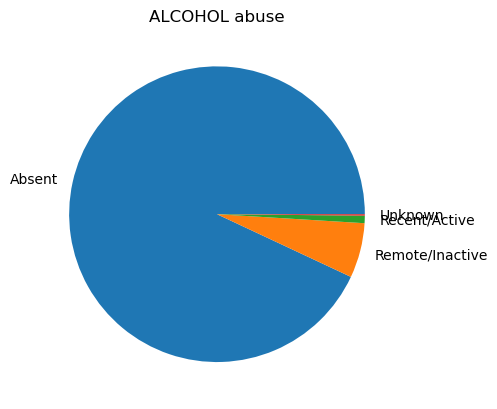

In [74]:
mapping = {
    0: 'Absent',
    1: 'Recent/Active',
    2: 'Remote/Inactive',
    9: 'Unknown',
    -4: 'Not available: UDS form submitted did not collect data in this way, or a skip pattern precludes response to this question Form, version'
}

new_data['ALCOHOL'] = new_data['ALCOHOL'].replace(mapping)

alcohol_classes = new_data['ALCOHOL'].value_counts()

# Plotting pie chart
plt.pie(alcohol_classes, labels=alcohol_classes.index)

# Add labels and title
plt.title('ALCOHOL abuse')

# Show plot
plt.show()

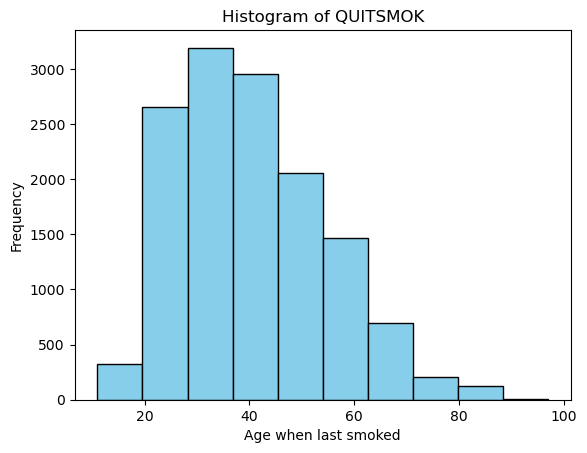

In [75]:
# Create histogram
plt.hist(new_data['QUITSMOK'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age when last smoked')
plt.ylabel('Frequency')
plt.title('Histogram of QUITSMOK')

# Show plot
plt.show()

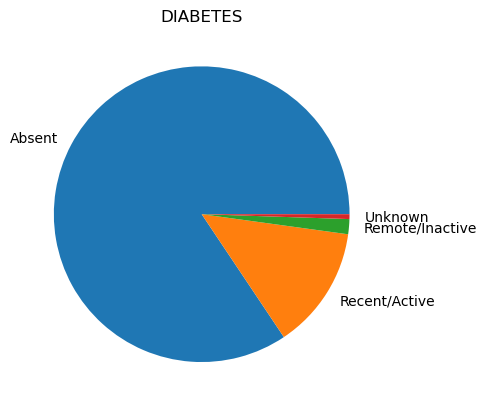

In [76]:
mapping = {
    0: 'Absent',
    1: 'Recent/Active',
    2: 'Remote/Inactive',
    9: 'Unknown',
    -4: 'Not available: UDS form submitted did not collect data in this way, or a skip pattern precludes response to this question Form, version'
}

new_data['DIABETES'] = new_data['DIABETES'].replace(mapping)

diabetes_classes = new_data['DIABETES'].value_counts()

# Plotting pie chart
plt.pie(diabetes_classes, labels=diabetes_classes.index)

# Add title
plt.title('DIABETES')
# Show plot
plt.show()

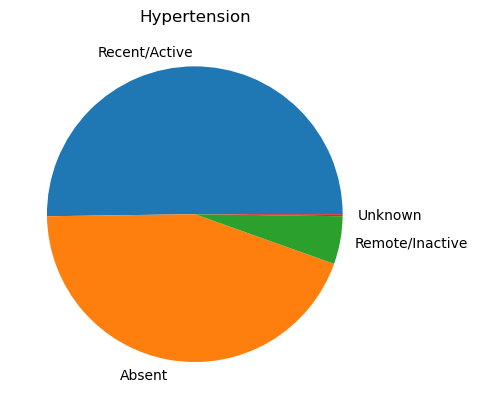

In [77]:
mapping = {
    0: 'Absent',
    1: 'Recent/Active',
    2: 'Remote/Inactive',
    9: 'Unknown',
    -4: 'Not available: UDS form submitted did not collect data in this way, or a skip pattern precludes response to this question Form, version'
}

new_data['HYPERTEN'] = new_data['HYPERTEN'].replace(mapping)

hypertesion_classes = new_data['HYPERTEN'].value_counts()

# Plotting pie chart
plt.pie(hypertesion_classes, labels=hypertesion_classes.index)

# Add title
plt.title('Hypertension')
# Show plot
plt.show()

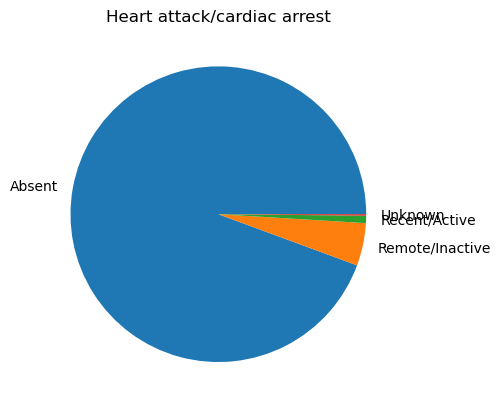

In [78]:
mapping = {
    0: 'Absent',
    1: 'Recent/Active',
    2: 'Remote/Inactive',
    9: 'Unknown',
    -4: 'Not available: UDS form submitted did not collect data in this way, or a skip pattern precludes response to this question Form, version'
}

new_data['CVHATT'] = new_data['CVHATT'].replace(mapping)

cvhatt_classes = new_data['CVHATT'].value_counts()

# Plotting pie chart
plt.pie(cvhatt_classes, labels=cvhatt_classes.index)

# Add title
plt.title('Heart attack/cardiac arrest')
# Show plot
plt.show()

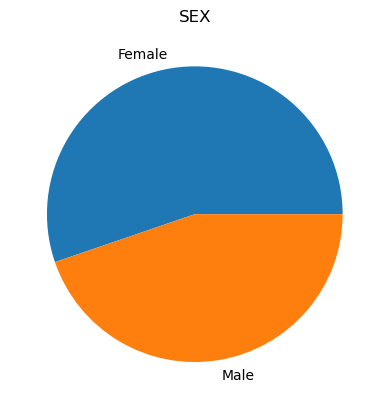

In [79]:
mapping = {
    1: 'Male',
    2: 'Female',
}

new_data['SEX'] = new_data['SEX'].replace(mapping)

sex_classes = new_data['SEX'].value_counts()

# Plotting pie chart
plt.pie(sex_classes, labels=sex_classes.index)

# Add title
plt.title('SEX')
# Show plot
plt.show()

In [80]:
cluster_1 = selected_features[selected_features['Class']==1]
cluster_1.to_csv('Class=1.csv', index=False)

In [81]:
cluster_0 = selected_features[selected_features['Class']==0]
cluster_0.to_csv('Class=0.csv', index=False)